<a href="https://colab.research.google.com/github/experienciarg200-alt/Python-con-Pandas/blob/main/Actividad4EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Rafael Augusto Guerrero Guerrero
*   MATRÍCULA: A01796515

En esta actividad trabajarás con el archivo `personal_loan.csv`, basado en un conjunto de datos sobre clientes bancarios y su comportamiento financiero disponible en Kaggle.

Los datos fueron recopilados para analizar la posibilidad de que los clientes acepten un préstamo personal y contienen información demográfica, financiera y de productos bancarios asociados. Los indicadores incluidos son:

* `ID`: Identificador único del cliente
* `Age`: Edad del cliente (años completos)
* `Experience`: Experiencia laboral en años
* `Income`: Ingreso anual del cliente (en miles de dólares. Por ejemplo, 60 = 60,000 USD/año)
* `ZIP Code`: Código postal del cliente
* `Family`: Número de miembros de la familia
* `CCAvg`: Promedio de gastos mensuales con tarjeta de crédito (en miles de dólares)
* `Education`: Nivel educativo (1 = graduado, 2 = universitario, 3 = posgrado)
* `Mortgage`: Monto de hipoteca que posee el cliente (en miles de dólares)
* `Securities Account`: Indicador de si tiene cuenta de valores (1 = sí, 0 = no)
* `CD Account`: Indicador de si tiene cuenta de certificado de depósito (1 = sí, 0 = no)
* `Online`: Indicador de si usa los servicios bancarios en línea (1 = sí, 0 = no)
* `CreditCard`: Indicador de si es titular de tarjeta de crédito (1 = sí, 0 = no)
* `Personal Loan`: Si el cliente aceptó (1) o no (0) un préstamo personal. Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

1. Descarga el archivo: `personal_loan.csv` y guarda, en un dataframe (`loan_df`), todos sus registros.
* Haz que la columna `ID` sea el índice del dataframe.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?

Según las informaciones obtenidas por el dataframe, 9 columnas son del tipo numérico y 5 contienen cadenas de textos o datos mixtos.

In [2]:
loan_df = pd.read_csv('personal_loan.csv')
loan_df
(loan_df.info())
loan_df.set_index('ID', inplace=True)
loan_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5037 non-null   int64  
 1   Age                 5037 non-null   int64  
 2   Experience          5037 non-null   int64  
 3   Income              5037 non-null   int64  
 4   ZIP Code            5037 non-null   int64  
 5   Family              5037 non-null   int64  
 6   CCAvg               5037 non-null   float64
 7   Education           5037 non-null   float64
 8   Mortgage            5037 non-null   int64  
 9   Personal Loan       5037 non-null   object 
 10  Securities Account  5037 non-null   object 
 11  CD Account          5037 non-null   object 
 12  Online              5037 non-null   object 
 13  CreditCard          5037 non-null   object 
dtypes: float64(2), int64(7), object(5)
memory usage: 551.1+ KB


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
0,25,1,49,91108,4,1.6,1.0,0,0,Yes,No,0,0
1,45,19,34,90089,3,1.5,1.0,0,No,Yes,No,No,0
2,39,15,11,94720,1,1.0,1.0,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2.0,0,0,0,0,No,0
4,35,8,45,91330,4,1.0,2.0,0,0,No,No,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,34,9,65,95134,4,1.3,1.0,0,0,No,No,No,Yes
5033,45,20,84,94131,4,1.1,2.0,180,0,No,0,1,0
5034,47,23,148,94551,2,7.5,1.0,0,0,No,1,Yes,Yes


# Limpieza

2. Obtén las estadísticas descriptivas de las variables numéricas y examina cuidadosamente los valores obtenidos de cada columna.
* Filtra el dataframe para visualizar los registros en que la edad supera los 100 años y elimínalos si no son pausibles.
* Analiza el resto de las variables y elimina aquellos registros que contengan valores inválidos o inconsistentes. Para cada acción que realices, justifica la decisión, explicando por qué consideras que el valor es incorrecto.
* ¿Cuántos registros se eliminaron (considerando todas las acciones de este ejercicio) y qué porcentaje representa respecto al total del dataframe inicial?

Se filtraron los registeos con edades mayor a 100 añosy eleiminarlos.
Se eliminaron registros por estas causas: 1) Personas con más años de experiencia que de edad. 2) Registros con experiencias de laboral negativas. 3) Registros con ingreso anual negativo. 4) Registros con promedio de gastos en tarjetas de créditos negativos.

En total se eliminaron 57 registros, que representan el 1.13% del total inicial del dataframe.

In [3]:
df = pd.read_csv('personal_loan.csv')
print(df.describe())

print(f"Edad máxima: {df['Age'].max()}")

mayores_100 = df[df['Age'] > 100]
print("Registros a eliminar:")
print(mayores_100)

df_limpio = df.drop(df[df['Age'] > 100].index)

print(f"Nueva edad máxima: {df_limpio['Age'].max()}")

                ID          Age   Experience       Income      ZIP Code  \
count  5037.000000  5037.000000  5037.000000  5037.000000   5037.000000   
mean   2518.000000    45.411356    20.122494    73.898352  93152.865595   
std    1454.200983    11.646805    11.461278    46.130504   2119.637960   
min       0.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1259.000000    35.000000    10.000000    39.000000  91911.000000   
50%    2518.000000    45.000000    20.000000    64.000000  93437.000000   
75%    3777.000000    55.000000    30.000000    98.000000  94608.000000   
max    5036.000000   144.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  
count  5037.000000  5037.000000  5037.000000  5037.000000  
mean      2.394679     1.942404     1.880941    56.500695  
std       1.151145     1.755954     0.843337   101.657580  
min      -3.000000     0.000000     1.000000     0.000000  
25%       1.000000     0

In [4]:
df = pd.read_csv("personal_loan.csv")
total_inicial = df.shape[0]

registros_validos = (
    (df["Age"] <= 100) &
    (df["Age"] > 0) &
    (df["Experience"] >= 0) &
    (df["Experience"] <= df["Age"]) &
    (df["Income"] >= 0) &
    (df["CCAvg"] >= 0) &
    (df["Mortgage"] >= 0) &
    (df["Education"].isin([1, 2, 3]))
)

df_limpio = df[registros_validos]
eliminados = total_inicial - df_limpio.shape[0]
porcentaje = eliminados / total_inicial * 100

print("Registros originales:", total_inicial)
print("Registros después de limpieza:", df_limpio.shape[0])
print("Registros eliminados:", eliminados)
print(f"Porcentaje eliminado: {porcentaje:.2f}%")

df_limpio.head()

Registros originales: 5037
Registros después de limpieza: 4980
Registros eliminados: 57
Porcentaje eliminado: 1.13%


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,25,1,49,91108,4,1.6,1.0,0,0,Yes,No,0,0
1,1,45,19,34,90089,3,1.5,1.0,0,No,Yes,No,No,0
2,2,39,15,11,94720,1,1.0,1.0,0,0,0,0,0,0
3,3,35,9,100,94112,1,2.7,2.0,0,0,0,0,No,0
4,4,35,8,45,91330,4,1.0,2.0,0,0,No,No,0,1


3. Obtén las estadísticas descriptivas de las variables de texto e imprime las frecuencias de sus categorías.
* Algunas columnas almacenan valores binarios utilizando distintos formatos. Unifica estos valores de manera consistente, asegurándote de que coincidan con la descripción de las variables al inicio de esta libreta.

In [5]:
df = pd.read_csv("personal_loan.csv")

columnas_binarias = [
    "Securities Account",
    "CD Account",
    "Online",
    "CreditCard",
    "Personal Loan"
]

mapa_binario = {
    "Yes": 1, "No": 0,
    True: 1, False: 0
}

for col in columnas_binarias:
    df[col] = (
        df[col]
            .replace(mapa_binario)
            .fillna(0)
            .astype(int)
    )

df[columnas_binarias].head()

,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,1,0


4. Verifica si hay registros duplicados y si fuera así, elimínalos del dataframe.
* Asegúrate de reiniciar el índice para mantener una secuencia continua tras todas las eliminaciones de registros que hasta este punto se han realizado.

In [6]:
num_duplicados = df.duplicated().sum()
print(f"Registros duplicados encontrados: {num_duplicados}")

df = (
    df
        .drop_duplicates()
        .reset_index(drop=True)
)

Registros duplicados encontrados: 0


5. Aunque hasta ahora se han considerado los tipos de datos inferidos por pandas, antes del EDA es recomendable revisar la naturaleza estadística de cada variable (continua, discreta, categórica, binaria, etc.) para aplicar el análisis adecuado.

* Efectúa las siguientes conversiones:
  - Nominal: ZIP Code - `object`
  - Ordinal: Education - `category` con orden 1, 2, 3
  - Binarias: Personal Loan, Securities Account, CD Account, Online, CreditCard - `category`
* Crea dos listas llamadas `num_cols` y `cat_cols` que contengan los nombres de las variables numéricas (int64, float64) y categóricas (object, category) del dataset, respectivamente.

In [14]:

df["ZIP Code"] = df["ZIP Code"].astype("object")

df["Education"] = pd.Categorical(
    df["Education"],
    categories=[1, 2, 3],
    ordered=True
)

binarias = [
    "Personal Loan",
    "Securities Account",
    "CD Account",
    "Online",
    "CreditCard"
]

df[binarias] = df[binarias].astype("category")

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Variables numéricas:")
print(num_cols)

print("\nVariables categóricas:")
print(cat_cols)

print("\nTipos de datos finales:")
print(df.dtypes)

Variables numéricas:
['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

Variables categóricas:
['ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

Tipos de datos finales:
ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                object
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object


# Análisis exploratorio de datos (univariado)

6. Para el análisis de las variables numéricas obtén nuevamente las estadísticas descriptivas incluyendo los valores de simetría y curtosis.
* Clasifica las variables `Age`, `Income` y `Mortgage` según los valores observados de asimetría y curtosis.

In [15]:
desc_num = df[num_cols].describe().T

# Añadir asimetría y curtosis
desc_num["skewness"] = df[num_cols].skew()
desc_num["kurtosis"] = df[num_cols].kurtosis()

print(desc_num)

             count         mean          std   min     25%     50%     75%  \
ID          5037.0  2518.000000  1454.200983   0.0  1259.0  2518.0  3777.0   
Age         5037.0    45.411356    11.646805  23.0    35.0    45.0    55.0   
Experience  5037.0    20.122494    11.461278  -3.0    10.0    20.0    30.0   
Income      5037.0    73.898352    46.130504   8.0    39.0    64.0    98.0   
Family      5037.0     2.394679     1.151145  -3.0     1.0     2.0     3.0   
CCAvg       5037.0     1.942404     1.755954   0.0     0.7     1.5     2.6   
Mortgage    5037.0    56.500695   101.657580   0.0     0.0     0.0   101.0   

               max  skewness  kurtosis  
ID          5036.0  0.000000 -1.200000  
Age          144.0  0.212048  0.695032  
Experience    43.0 -0.028702 -1.118471  
Income       224.0  0.841004 -0.046822  
Family         4.0  0.132673 -1.310977  
CCAvg         10.0  1.605970  2.676221  
Mortgage     635.0  2.101346  4.742307  


7. Genera un histograma para cada variable numérica, incluyendo la curva KDE y la curva de una distribución normal como referencia.
* Para las variables que clasificaste antes, compara los histogramas generados con los valores numéricos calculados y comenta si la forma de cada distribución coincide con lo esperado.
* Para cada variable, crea un gráfico de boxplot individual que incluya la media.
* Analiza la posición de la media respecto a la mediana. ¿Qué indica esta relación sobre el sesgo (asimetría) de la distribución?

En la gráfica de distribución de Income, se observa un sesgo a la derecha. (Asimetría positiva) lo que indica que, la mayor cantidad de información con menor volor, por lo que de este lado se concentran la menor densidad.
En la distribución de Mortgage, se observa una acurtosis demasiado asimétrica y un fuerte sesgo a la derecha, con una gran ocurrencia de valores atípicos.   

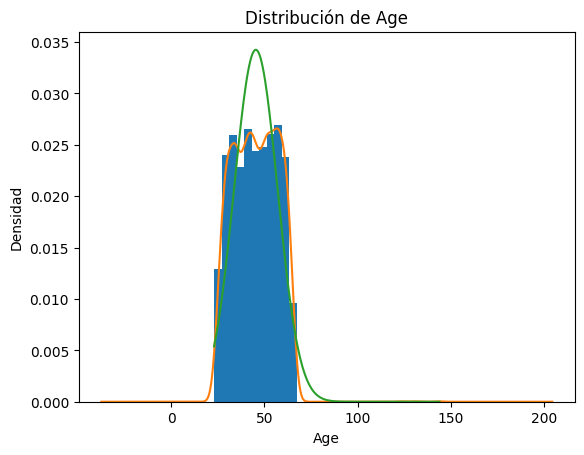

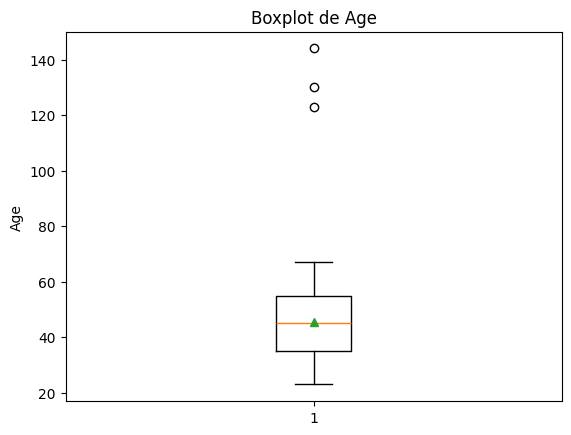

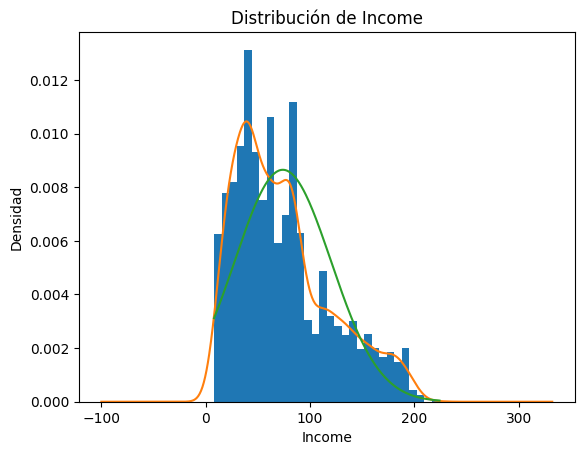

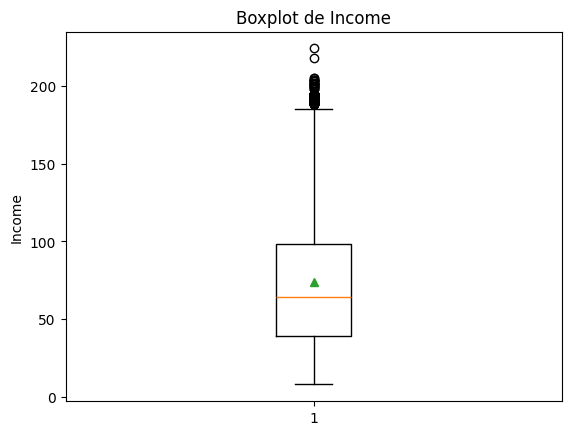

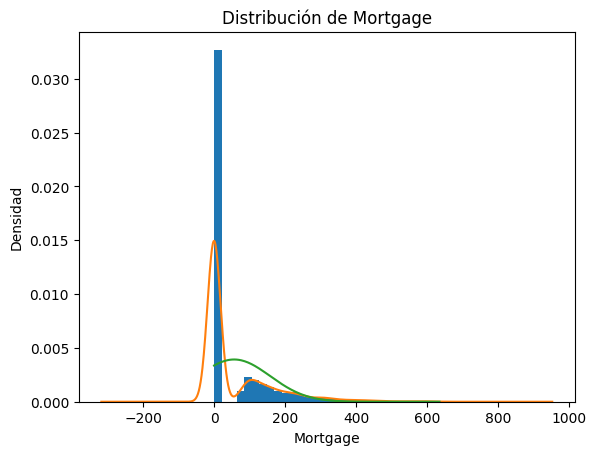

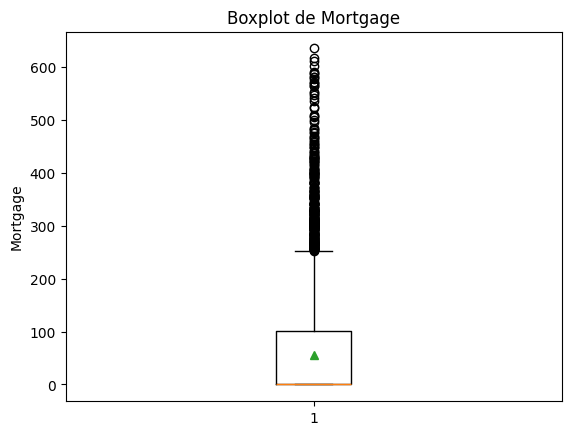

In [16]:
vars_analisis = ["Age", "Income", "Mortgage"]

for var in vars_analisis:
    data = df[var].dropna()
    plt.figure()
    plt.hist(data, bins=30, density=True)
    data.plot(kind="kde")

    mu, sigma = data.mean(), data.std()
    x = np.linspace(data.min(), data.max(), 200)
    plt.plot(x, norm.pdf(x, mu, sigma))

    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Densidad")
    plt.show()

    plt.figure()
    plt.boxplot(data, showmeans=True)
    plt.title(f"Boxplot de {var}")
    plt.ylabel(var)
    plt.show()

8. Obtén las estadísticas descriptivas de las variables categóricas.
* Genera un gráfico de barras para cada variable. En las de alta cardinalidad, sólo incluye los 10 valores más relevantes.

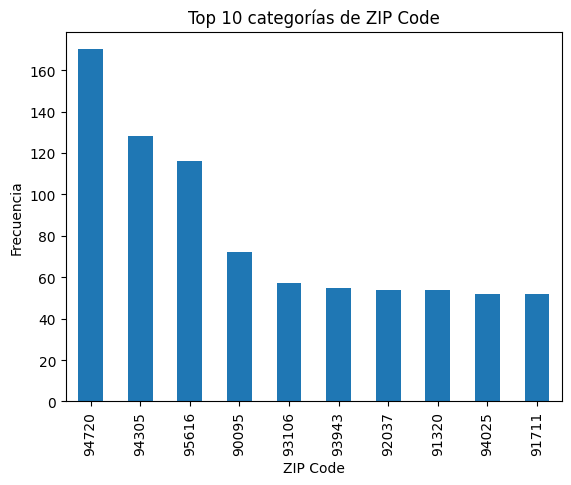

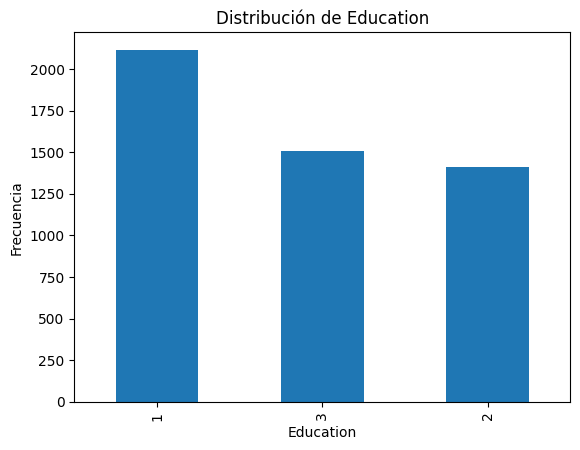

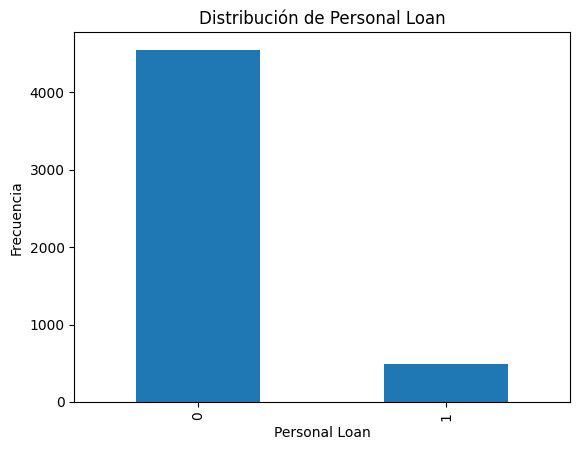

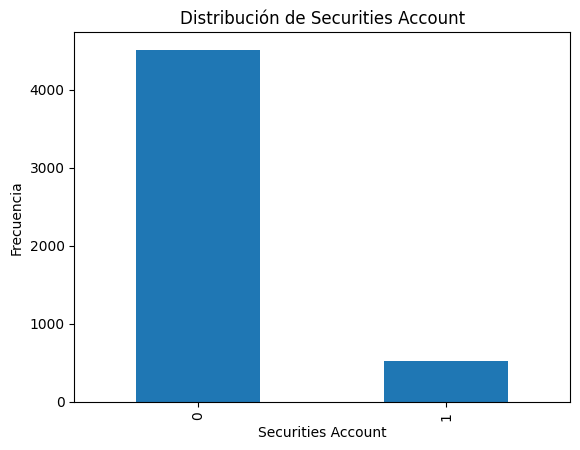

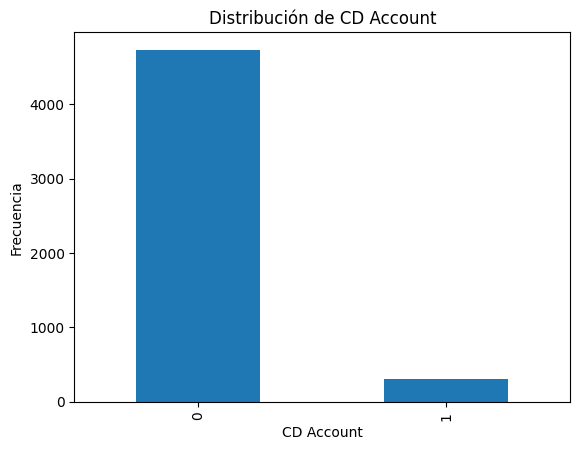

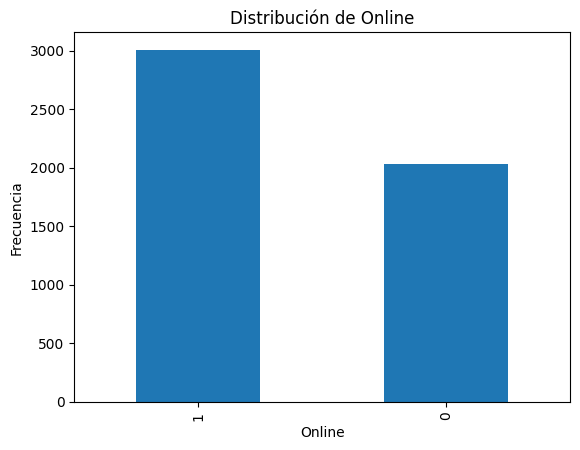

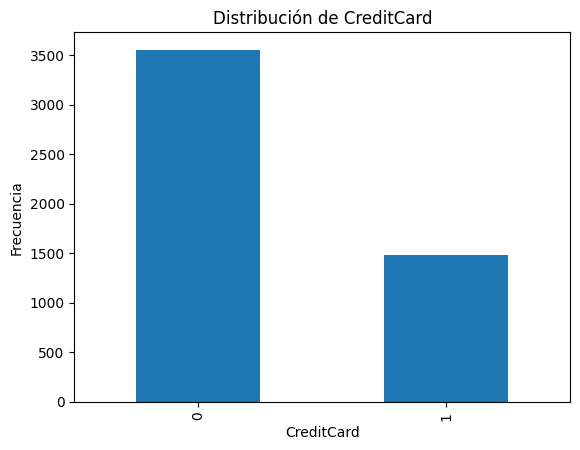

In [17]:
for col in cat_cols:
    plt.figure()

    if df[col].nunique() > 10:
        df[col].value_counts().head(10).plot(kind="bar")
        plt.title(f"Top 10 categorías de {col}")
    else:
        df[col].value_counts().plot(kind="bar")
        plt.title(f"Distribución de {col}")

    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Análisis exploratorio de datos (bivariado)

9. Obtén la matriz de gráficos de dispersión (*scatter matrix*) de todas las variables numéricas.
* Observa las relaciones entre las variables, selecciona un par representativo y describe los patrones o tendencias que sean evidentes.
* Para cuantificar la fuerza y dirección de las relaciones observadas, genera un mapa de calor con los valores de correlación de *Pearson*. ¿El valor numérico obtenido del par seleccionado se corresponde con lo esperado?

El valor numerico obtenido se corresponde con lo esperado debido a que, el valor numérico o coeficiente de relación, es coherente con el patron visual observado.

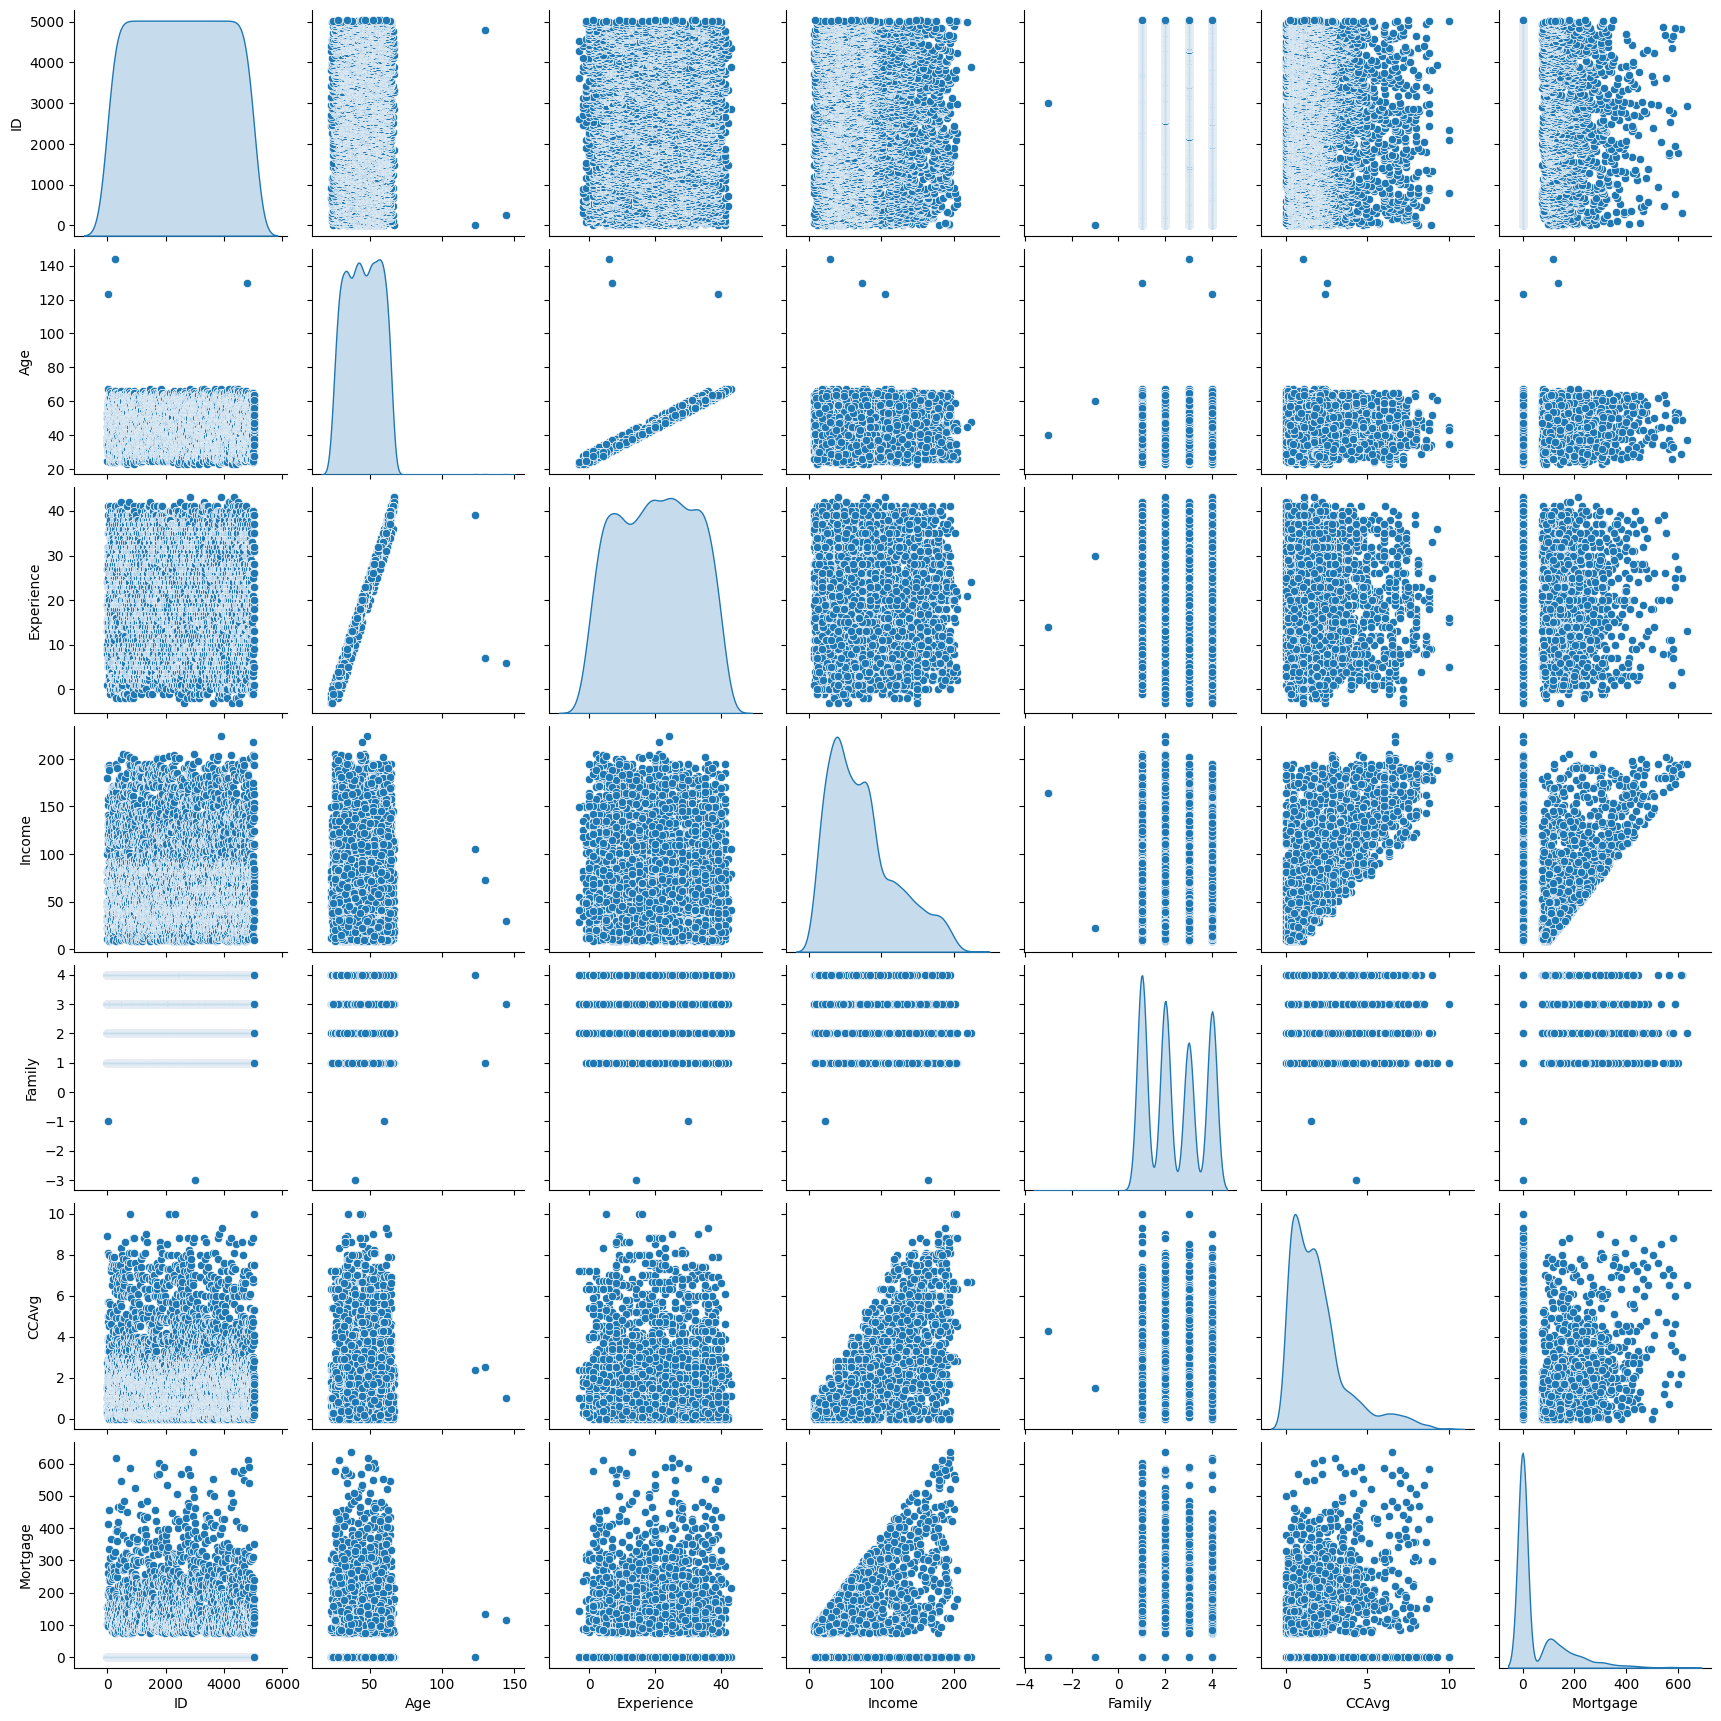

Matriz de correlación:
                  ID       Age  Experience    Income    Family     CCAvg  \
ID          1.000000 -0.007472   -0.005525 -0.012763 -0.016936 -0.019815   
Age        -0.007472  1.000000    0.975279 -0.053505 -0.045984 -0.051036   
Experience -0.005525  0.975279    1.000000 -0.044843 -0.052925 -0.050135   
Income     -0.012763 -0.053505   -0.044843  1.000000 -0.159438  0.646581   
Family     -0.016936 -0.045984   -0.052925 -0.159438  1.000000 -0.111553   
CCAvg      -0.019815 -0.051036   -0.050135  0.646581 -0.111553  1.000000   
Mortgage   -0.013684 -0.008729   -0.008959  0.205683 -0.019029  0.108305   

            Mortgage  
ID         -0.013684  
Age        -0.008729  
Experience -0.008959  
Income      0.205683  
Family     -0.019029  
CCAvg       0.108305  
Mortgage    1.000000  


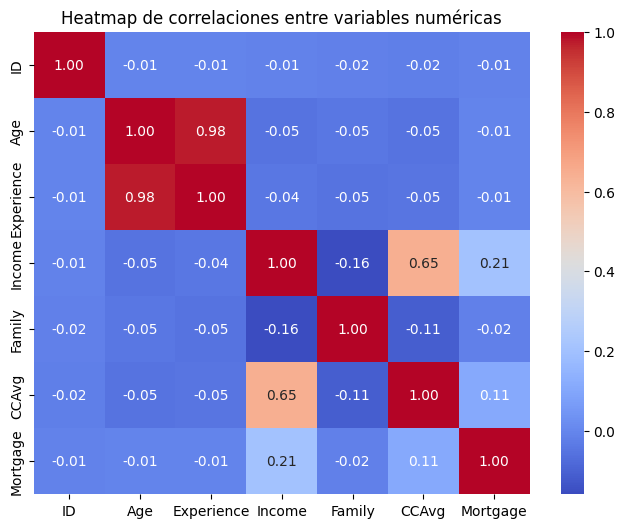

In [29]:
sns.pairplot(
    df[num_cols],
    diag_kind="kde"
)

plt.show()
corr_matrix = df[num_cols].corr()

print("Matriz de correlación:")
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Heatmap de correlaciones entre variables numéricas")
plt.show()

10. Realiza un análisis de todas las variables del dataset con respecto a la variable de salida `Personal Loan`.
* Variables numéricas: Genera box plots para comparar la distribución de cada variable según los valores de `Personal Loan`.
* Variables categóricas (sin considerar `ZIP Code`): Genera gráficos de barras apiladas que muestren la distribución relativa de `Personal Loan` dentro de cada categoría de la variable.
* Para cada grupo de variables (numéricas y categóricas), comenta al menos un hallazgo o patrón relevante observado en los gráficos generados.


En la gráfica de ingresos (Icome) existen medias y medianas más altas, al ser la dispersión mayor en el grupo con prestamo, esto sugiere que, los ingresos son un factor clave para tomar un préstamo. Igualmente la variable CCAvg, presenta diferencias notable entre clientes con o sin préstamos personal. Las demás, Age, Family y experience, muestranmayor superpocisión en los grupos, por lo que no diferencian tanto, a quienes toman los préstamos.

<Figure size 640x480 with 0 Axes>

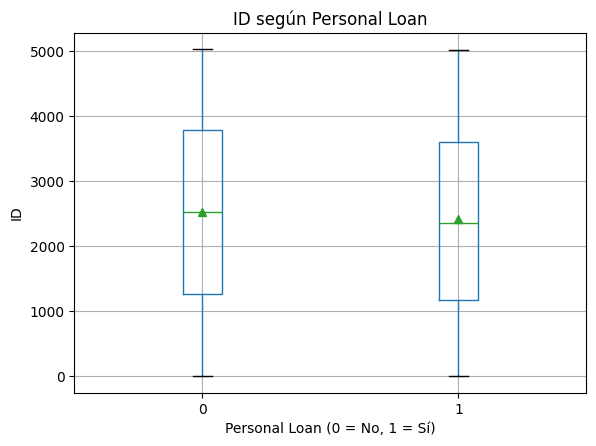

<Figure size 640x480 with 0 Axes>

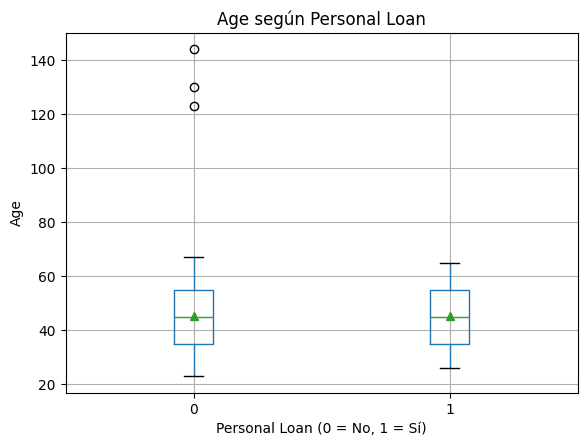

<Figure size 640x480 with 0 Axes>

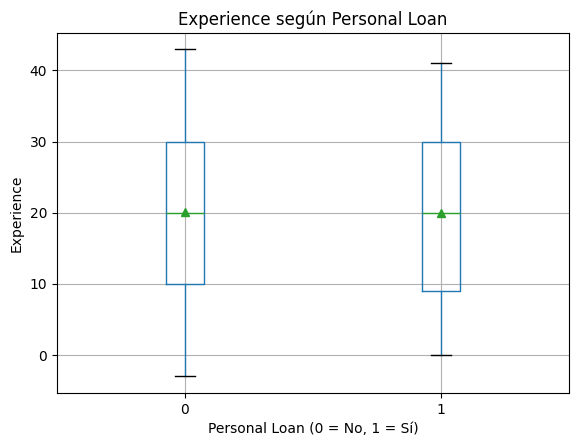

<Figure size 640x480 with 0 Axes>

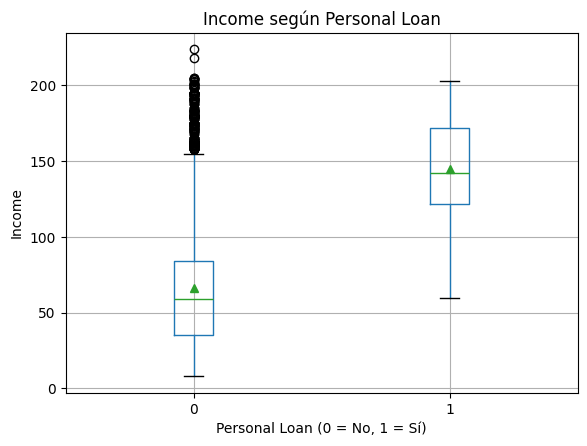

<Figure size 640x480 with 0 Axes>

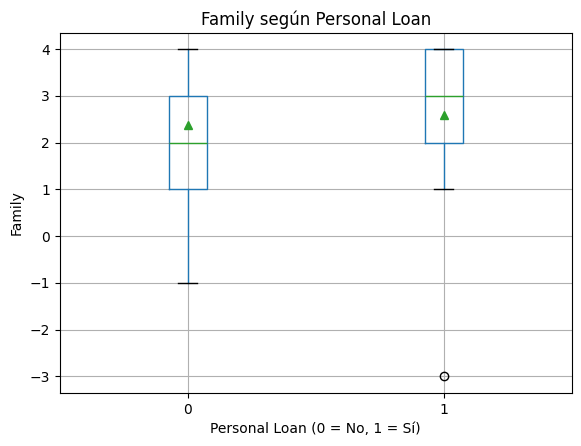

<Figure size 640x480 with 0 Axes>

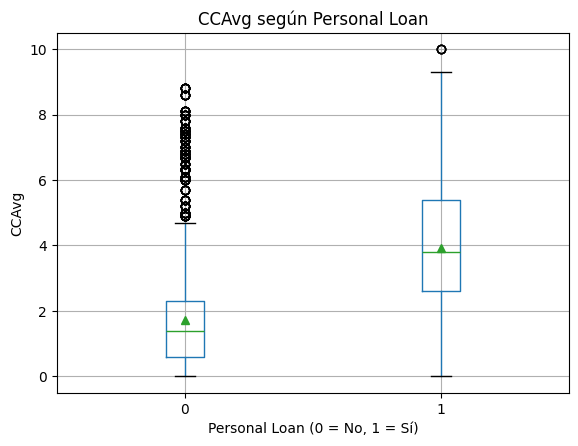

<Figure size 640x480 with 0 Axes>

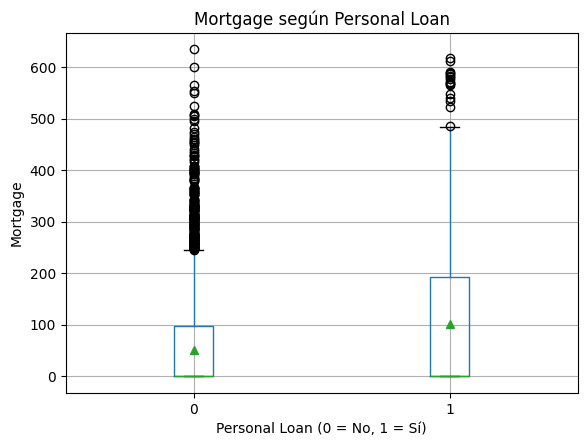

In [24]:
num_vars = num_cols.copy()

for var in num_vars:
    plt.figure()
    df.boxplot(column=var, by="Personal Loan", showmeans=True)
    plt.title(f"{var} según Personal Loan")
    plt.suptitle("")
    plt.xlabel("Personal Loan (0 = No, 1 = Sí)")
    plt.ylabel(var)
    plt.show()